# Seattle Airbnb Open Dataset - CRISP-DM Data Analysis

# 1) Business Understanding

# 2) Data Understanding

Setup 

In [20]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [21]:
#load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

In [22]:
#check the dataset
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [23]:
#check the shape of the dataset
calendar.shape

(1393570, 4)

In [24]:
#check the numeric values of the dataset
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [25]:
#some process with listings dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [26]:
listings.shape

(3818, 92)

In [27]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# data understanding on listing dataset

In [28]:
#checking the missing values in the dataframe
list_missing = listings.isna().sum().tolist()
columns_names = list(listings.columns)

#list with the column's missing values
for a, b in zip(columns_names, list_missing):
    print(f"{a}: {b}")

id: 0
listing_url: 0
scrape_id: 0
last_scraped: 0
name: 0
summary: 177
space: 569
description: 0
experiences_offered: 0
neighborhood_overview: 1032
notes: 1606
transit: 934
thumbnail_url: 320
medium_url: 320
picture_url: 0
xl_picture_url: 320
host_id: 0
host_url: 0
host_name: 2
host_since: 2
host_location: 8
host_about: 859
host_response_time: 523
host_response_rate: 523
host_acceptance_rate: 773
host_is_superhost: 2
host_thumbnail_url: 2
host_picture_url: 2
host_neighbourhood: 300
host_listings_count: 2
host_total_listings_count: 2
host_verifications: 0
host_has_profile_pic: 2
host_identity_verified: 2
street: 0
neighbourhood: 416
neighbourhood_cleansed: 0
neighbourhood_group_cleansed: 0
city: 0
state: 0
zipcode: 7
market: 0
smart_location: 0
country_code: 0
country: 0
latitude: 0
longitude: 0
is_location_exact: 0
property_type: 1
room_type: 0
accommodates: 0
bathrooms: 16
bedrooms: 6
beds: 1
bed_type: 0
amenities: 0
square_feet: 3721
price: 0
weekly_price: 1809
monthly_price: 2301
se

In [29]:
#select the columns that are relevant to the problem, also drop the columns with most of values missing
new_listings = ['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
               'host_is_superhost', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 
               'accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 
               'cancellation_policy', 'reviews_per_month']

listings = listings[new_listings]
listings.shape

(3818, 20)

In [30]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,100%,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
1,953595,5177328,2013-02-21,within an hour,98%,100%,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,43,96.0,strict,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,100%,f,t,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,20,97.0,strict,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,f,t,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,0,NaN,flexible,NaN
4,278830,1452570,2011-11-29,within an hour,100%,NaN,f,t,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,38,92.0,strict,0.89


In [31]:
#dealing with missing values in new dataframe
listings.isna().sum().sort_values(ascending=False)

missing_percent = listings.isna().mean().sort_values(ascending=False)

In [32]:
missing_percent

host_acceptance_rate            0.202462
review_scores_rating            0.169460
reviews_per_month               0.164222
host_response_time              0.136983
host_response_rate              0.136983
bathrooms                       0.004191
bedrooms                        0.001572
host_since                      0.000524
host_is_superhost               0.000524
host_identity_verified          0.000524
property_type                   0.000262
minimum_nights                  0.000000
cancellation_policy             0.000000
number_of_reviews               0.000000
id                              0.000000
guests_included                 0.000000
accommodates                    0.000000
host_id                         0.000000
neighbourhood_group_cleansed    0.000000
room_type                       0.000000
dtype: float64

# data understanding on calendar dataset 

In [33]:
#since id from listings dataset and listing_id from calendar dataset seem similar
#performing checks to determine if merging is easy to be done, enchancing the data preprocessing process overall
len(calendar['listing_id'])
len(calendar['listing_id'].unique())

#since multiple values of listing_id are present, using set for checking
len(set(calendar['listing_id']))

#check missing values in price
calendar['price'].isna().sum()

459028

In [34]:
#checking if any missing values are present
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [35]:
calendar.shape

(1393570, 4)

In [36]:
#drop values that are NaN in calendar dataset
calendar.dropna(inplace=True)

In [37]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [38]:
#rename id column in listings dataset to listing_id to merge by column with calendar dataset
listings.rename(columns={"id": "listing_id"}, inplace=True)

In [39]:
listings.shape

(3818, 20)

# 3) Prepare Data

We noticed that both datasets contain the column listing_id, hence we can merge them for better data enchantment.

In [40]:
#merge two datasets by listing_id
df = pd.merge(calendar, listings, on='listing_id')

In [41]:
#check missing values after merge
df.isnull().sum()

listing_id                           0
date                                 0
available                            0
price                                0
host_id                              0
host_since                          92
host_response_time              108514
host_response_rate              108514
host_acceptance_rate            170307
host_is_superhost                   92
host_identity_verified              92
neighbourhood_group_cleansed         0
property_type                      309
room_type                            0
accommodates                         0
bathrooms                         4803
bedrooms                          2003
guests_included                      0
minimum_nights                       0
number_of_reviews                    0
review_scores_rating            144537
cancellation_policy                  0
reviews_per_month               139366
dtype: int64

In [42]:
df.shape

(934542, 23)

In [43]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month'],
      dtype='object')

In [44]:
df.dtypes

listing_id                        int64
date                             object
available                        object
price                            object
host_id                           int64
host_since                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_identity_verified           object
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
guests_included                   int64
minimum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
cancellation_policy              object
reviews_per_month               float64
dtype: object

# cleaning the dataset

In [45]:
df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,2016-01-04,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
1,241032,2016-01-05,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
2,241032,2016-01-13,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
3,241032,2016-01-14,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
4,241032,2016-01-18,t,$85.00,956883,2011-08-11,within a few hours,96%,100%,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07


In [46]:
#column price contains $ sign, hence it needs to be remove as % from host_response_time and respone_rate
#convert them then to float variables
df['price'] = df['price'].str.replace('[$, ]', '').astype('float')
df['host_response_rate'] = df['host_response_rate'].str.replace('[%, ]', '').astype('float')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('[%, ]', '').astype('float')


C:\Users\nick_\AppData\Local\Temp\ipykernel_4540\2453457190.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace('[$, ]', '').astype('float')
C:\Users\nick_\AppData\Local\Temp\ipykernel_4540\2453457190.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_response_rate'] = df['host_response_rate'].str.replace('[%, ]', '').astype('float')
C:\Users\nick_\AppData\Local\Temp\ipykernel_4540\2453457190.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('[%, ]', '').astype('float')


In [47]:
df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,2016-01-04,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
1,241032,2016-01-05,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
2,241032,2016-01-13,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
3,241032,2016-01-14,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07
4,241032,2016-01-18,t,85.0,956883,2011-08-11,within a few hours,96.0,100.0,f,...,Entire home/apt,4,1.0,1.0,2,1,207,95.0,moderate,4.07


In [48]:
#also turning boolean variables to 0 and 1
#variable available
df['available'] = df['available'].map({'t':1.0, 'f':0.0})

#host_is_superhost variable
df['host_is_superhost'] = df['host_is_superhost'].map({'t':1.0, 'f':0.0})

#host_identity_verified variable
df['host_identity_verified'] = df['host_identity_verified'].map({'t':1.0, 'f':0.0})

In [49]:
#turning variables date and host_since to datetime format
df['date'] = pd.to_datetime(df['date'])

#seperate new date variable to month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


df['host_since'] = pd.to_datetime(df['host_since'])

#seperate new host_since variable to year
df['host_since_year'] = df['host_since'].dt.year.astype("Int64")

In [50]:
df.head()

,listing_id,date,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,month,year,host_since_year
0,241032,2016-01-04,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
1,241032,2016-01-05,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
2,241032,2016-01-13,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
3,241032,2016-01-14,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
4,241032,2016-01-18,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011


In [51]:
df.dtypes

listing_id                               int64
date                            datetime64[ns]
available                              float64
price                                  float64
host_id                                  int64
host_since                      datetime64[ns]
host_response_time                      object
host_response_rate                     float64
host_acceptance_rate                   float64
host_is_superhost                      float64
host_identity_verified                 float64
neighbourhood_group_cleansed            object
property_type                           object
room_type                               object
accommodates                             int64
bathrooms                              float64
bedrooms                               float64
guests_included                          int64
minimum_nights                           int64
number_of_reviews                        int64
review_scores_rating                   float64
cancellation_

In [52]:
df.isnull().sum()

listing_id                           0
date                                 0
available                            0
price                                0
host_id                              0
host_since                          92
host_response_time              108514
host_response_rate              108514
host_acceptance_rate            170307
host_is_superhost                   92
host_identity_verified              92
neighbourhood_group_cleansed         0
property_type                      309
room_type                            0
accommodates                         0
bathrooms                         4803
bedrooms                          2003
guests_included                      0
minimum_nights                       0
number_of_reviews                    0
review_scores_rating            144537
cancellation_policy                  0
reviews_per_month               139366
month                                0
year                                 0
host_since_year          

# fill the missing values with mean, mode and median

In [53]:
#fill missing values with mean
def fillna_mean(df, col):
    df[col].fillna(df[col].mean(), inplace=True)
    return df

#for review_scores_rating and host_response_rate variables
fillna_mean(df, 'host_acceptance_rate')
fillna_mean(df, 'review_scores_rating')

#fill misssing values with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mode()[0])
df['host_is_superhost'] = df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0])
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])

#fill missing values with median
df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].median(),inplace=True)
df['host_since'].fillna(df['host_since'].median(),inplace=True)
df['host_since_year'].fillna(df['host_since_year'].median(),inplace=True)

In [54]:
df.isnull().sum()

listing_id                           0
date                                 0
available                            0
price                                0
host_id                              0
host_since                           0
host_response_time              108514
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_identity_verified               0
neighbourhood_group_cleansed         0
property_type                      309
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
guests_included                      0
minimum_nights                       0
number_of_reviews                    0
review_scores_rating                 0
cancellation_policy                  0
reviews_per_month                    0
month                                0
year                                 0
host_since_year          

In [55]:
#drop date column as it is not needed - replaced with month and year
df.drop(columns=['date'],inplace=True, axis=0)

In [56]:
df.head()

,listing_id,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,month,year,host_since_year
0,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
1,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
2,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
3,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
4,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011


# data ready for answering questions

In [57]:
#checking the years included in the dataset
df['year'].unique()

array([2016, 2017], dtype=int64)

# Question 1: Which is the most popular month to rent in Seattle?

In [58]:
#Question 1: Which is the most popular month to rent in Seattle?
df2 = df[df['year'] == 2016].groupby(['month'])['listing_id'].count().reset_index(name="count")

In [59]:
df2

,month,count
0,1,59239
1,2,73321
2,3,83938
3,4,76037
4,5,79971
5,6,77244
6,7,74222
7,8,76347
8,9,77246
9,10,82438


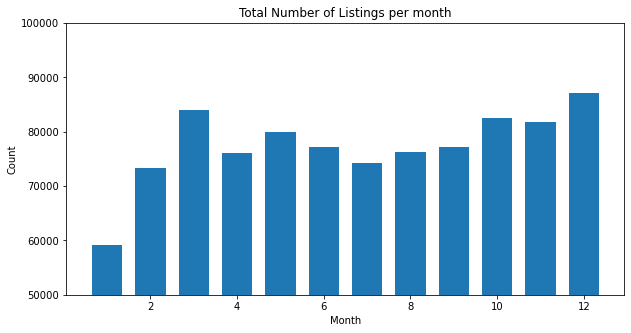

In [60]:
f, ax = plt.subplots(figsize=(10,5))

plt.bar(np.arange(1,13,step=1),df2['count'],align='center', width =0.7)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Number of Listings per month')
plt.ylim(50000, 100000)
plt.show()

From the above graph we can see that:

1) Lowest month of the year for renting is January (first month of the year).
2) Also, low months are February, April and July. Basically, summer months.
3) Most popular months for renting are March, October and December, with December being the most popular month for rent. Thus, the start of spring and the last months of Christmas holidays.

# Question 2: How prices are varrying in seattle based on neighbourhood?

In [61]:
#Question 2: How prices are varrying in seattle based on neighbourhood

#getting list of neighbourhoood areas in Seattle
areas = df.neighbourhood_group_cleansed.unique()
areas

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

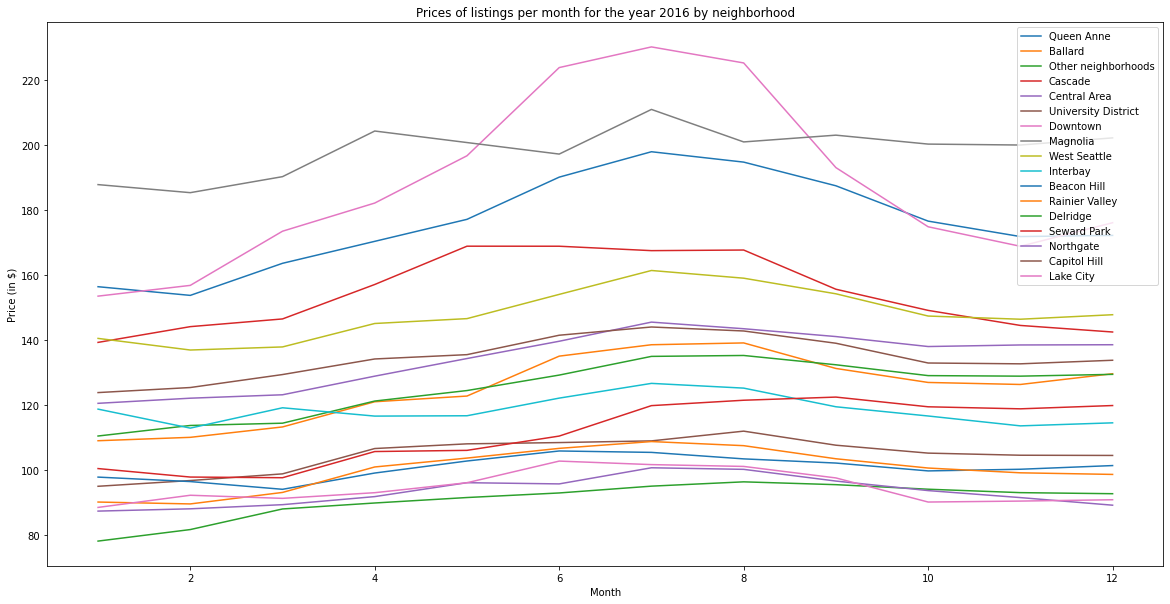

In [62]:
Nghood_df = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed','month'])['price'].mean().reset_index())
n1 = Nghood_df['neighbourhood_group_cleansed']

plt.figure(figsize= (20,10))
ax = plt.subplot()
for x in areas:
    ax.plot(Nghood_df[n1 == x]['month'],
            Nghood_df[n1 == x]['price'],
            label = x
           )
ax.legend(loc = 'upper right')
plt.xlabel('Month');
plt.ylabel('Price (in $)');
plt.title('Prices of listings per month for the year 2016 by neighborhood');

From the above graph we can see that the prices are higher on summer months, especially in July. Makes some sense since, summer months are low in popularity.
Most expensive neighborhood of Seattle is Downtown.

# 4) Data Modelling

To answer the last question about the features that determine the price of a listing, we need to create a ML model and provide our answer based on our findings.

# Question 3: How is price affected by the features of the dataset?

In [63]:
#first we need to turn the catagorical variables into dummies for modelling
df_d = pd.get_dummies(df.select_dtypes(['object']))

In [64]:
df_d.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
df.head()

,listing_id,available,price,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,bedrooms,guests_included,minimum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,month,year,host_since_year
0,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
1,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
2,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
3,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011
4,241032,1.0,85.0,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,...,1.0,2,1,207,95.0,moderate,4.07,1,2016,2011


In [66]:
#concatenate the two dataframes
df_merged = pd.concat([df.select_dtypes(['number']), df_d], axis=1)

In [67]:
#final dataset for models
df_merged

,listing_id,available,price,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,241032,1.0,85.0,956883,96.0,100.00000,0.0,1.0,4,1.0,...,0,0,0,0,1,0,0,0,1,0
1,241032,1.0,85.0,956883,96.0,100.00000,0.0,1.0,4,1.0,...,0,0,0,0,1,0,0,0,1,0
2,241032,1.0,85.0,956883,96.0,100.00000,0.0,1.0,4,1.0,...,0,0,0,0,1,0,0,0,1,0
3,241032,1.0,85.0,956883,96.0,100.00000,0.0,1.0,4,1.0,...,0,0,0,0,1,0,0,0,1,0
4,241032,1.0,85.0,956883,96.0,100.00000,0.0,1.0,4,1.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,10208623,1.0,87.0,14703116,100.0,99.95224,0.0,1.0,3,1.5,...,0,0,0,0,1,0,0,1,0,0
934538,10208623,1.0,87.0,14703116,100.0,99.95224,0.0,1.0,3,1.5,...,0,0,0,0,1,0,0,1,0,0
934539,10208623,1.0,87.0,14703116,100.0,99.95224,0.0,1.0,3,1.5,...,0,0,0,0,1,0,0,1,0,0
934540,10208623,1.0,87.0,14703116,100.0,99.95224,0.0,1.0,3,1.5,...,0,0,0,0,1,0,0,1,0,0


In [68]:
df_merged.columns

Index(['listing_id', 'available', 'price', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'accommodates', 'bathrooms', 'bedrooms', 'guests_included',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'month', 'year', 'host_since_year',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood

# Three models are going to be used

# 1) Lasso Regression Model

Lasso Regression Model Score:
Training_score = 0.62
Testing_score = 0.62


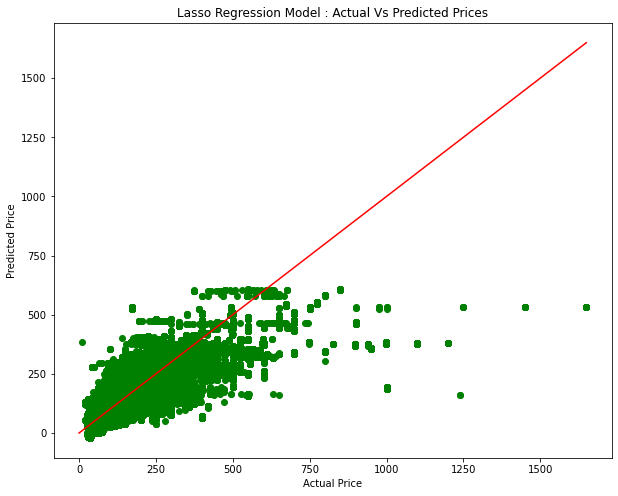

In [56]:
#import libraries for train test split, models and visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

#train test split
X = df_merged.drop(['price'], axis=1)
y = df_merged['price']

X_train, x_test, y_train, y_test = train_test_split(X, y)

#for Lasso model we will need to perform a scaling on our data
#MinMaxScaler function
s = MinMaxScaler()
X_train_scl = s.fit_transform(X_train)
x_test_scl = s.transform(x_test)

# 1. Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scl, y_train)
lasso_importance = np.abs(lasso.coef_)

#Score of Lasso model
train_score = lasso.score(X_train_scl, y_train)
test_score = lasso.score(x_test_scl, y_test)

#print scores of Lasso model
print('Lasso Regression Model Score:')
print("Training_score = {:.2f}".format(train_score))
print("Testing_score = {:.2f}".format(test_score))

#validate lasso regression model
y_pred_Lass = lasso.predict(x_test_scl)

# plotting graph of the results for actual vs predicted price
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred_Lass,marker='o',color='green');
x = np.linspace(0,max(y_test));
plt.plot(x,np.linspace(0,max(y_test)),color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Lasso Regression Model : Actual Vs Predicted Prices');
plt.show()

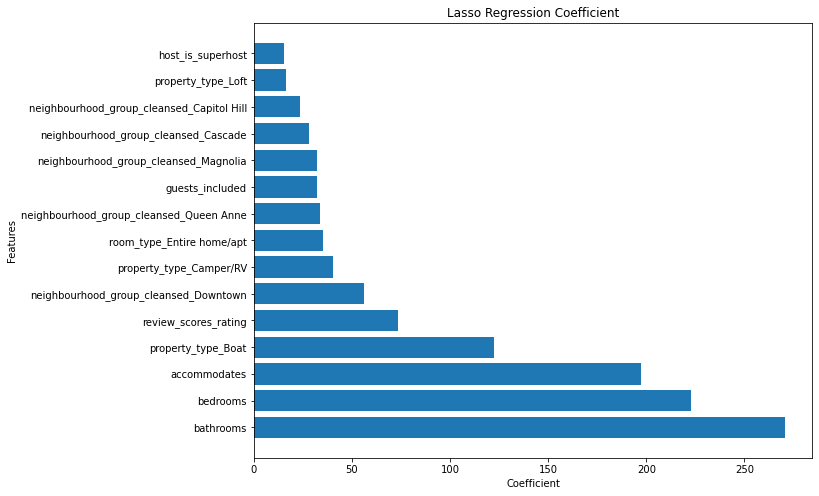

In [57]:
# Coefficient for Lasso Regression Model
lasso_coef,coef,c = lasso.coef_, 'Coefficient','Features'
Lasso_Coefs = pd.DataFrame({c:X_train.columns,coef:lasso_coef}).sort_values(by=coef,ascending=False).reset_index().drop(['index'],axis=1)[:15]

#Plottting in chart
f, ax = plt.subplots(figsize=(10,8))
plt.barh(Lasso_Coefs['Features'],Lasso_Coefs['Coefficient'],align='center')
plt.title('Lasso Regression Coefficient')
plt.ylabel('Features')
plt.xlabel('Coefficient')
plt.show()

From the above graph we can see that the feature that affects most the price is the bathroom feature and to put it in a simpler way, the number of bathrooms included in a listing.
The second is the bedroom and the third is accommodates that are included in a listing.

# 2) Random Forest Regression Model 

Random Forest Regression Model Score:
Training_score = 0.98
Testing_score = 0.98
Mean Squared Error: Train: 175.66, Test: 200.50
R Squared for Train: 0.98, Test: 0.98


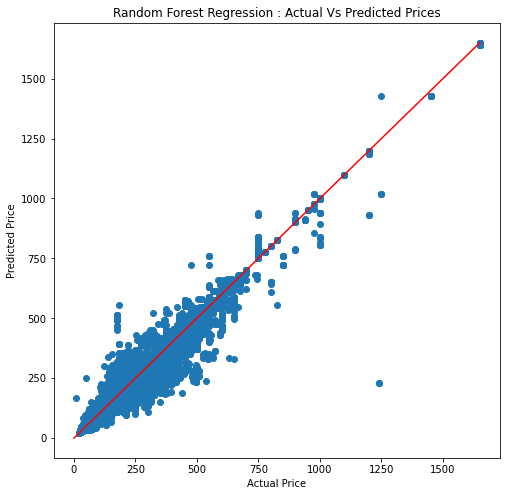

In [58]:
# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

#Score of random forest model
train_score = rf.score(X_train, y_train)
test_score = rf.score(x_test, y_test)

#print scores of Lasso model
print('Random Forest Regression Model Score:')
print("Training_score = {:.2f}".format(train_score))
print("Testing_score = {:.2f}".format(test_score))

#validate random forest regression model
y_train_rf_preds = rf.predict(X_train)
y_test_rf_preds = rf.predict(x_test)

# printing mean_squared_error and r2_score
print('Mean Squared Error: Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, y_train_rf_preds),
        mean_squared_error(y_test, y_test_rf_preds)))
print('R Squared for Train: %.2f, Test: %.2f' % (
        r2_score(y_train, y_train_rf_preds),
        r2_score(y_test, y_test_rf_preds)))

plt.figure(figsize = (8,8))
plt.scatter(y_test,y_test_rf_preds,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Random Forest Regression : Actual Vs Predicted Prices');

In [59]:
# Getting the most influential features in determining the price of the property
imp_features = pd.DataFrame({
        'Features' : X_train.columns,
    'Importance_of_feature' : rf.feature_importances_})


imp_features = imp_features.sort_values(by=['Importance_of_feature'],ascending=False).reset_index().drop(['index'],axis=1)[:15]


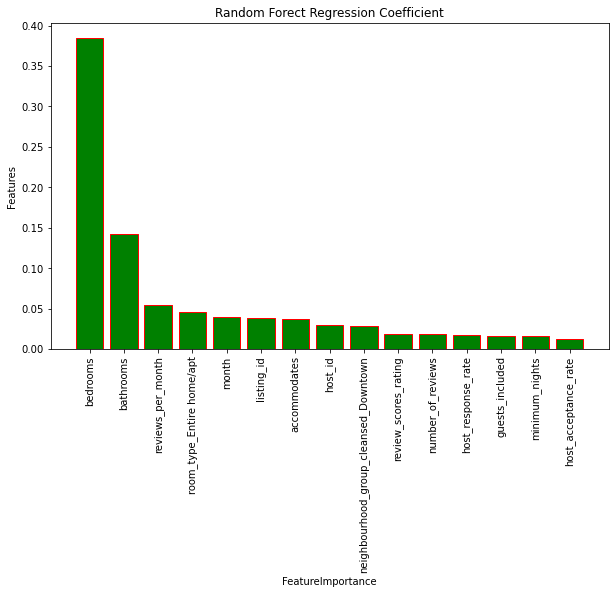

In [60]:
#Plottting in chart
f, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(imp_features['Features']))
plt.bar(y_pos,imp_features['Importance_of_feature'],color='green', edgecolor='red',align='center')
plt.xticks(y_pos, imp_features['Features'], rotation=90)
plt.title('Random Forect Regression Coefficient')
plt.ylabel('Features')
plt.xlabel('FeatureImportance')
plt.show()

Using Random Forest Regression model we get better scores, meaning that this method performs better at predicting prices. 
We can see, that the first and second features are now bedroom and bathroom, switched form the prediction of Lasso Regression model.
Third feature that affects the price is now reviews_per_month instead of accommodates from the Lasso Regression Model, that now appers in the 6th place along with month. 

# 3) XGBoost Regression Model

XGBoost Regression Model Score:
Training_score = 0.95
Testing_score = 0.95
Mean Squared Error: Train: 554.10, Test: 562.76
R Squared for Train: 0.95, Test: 0.95


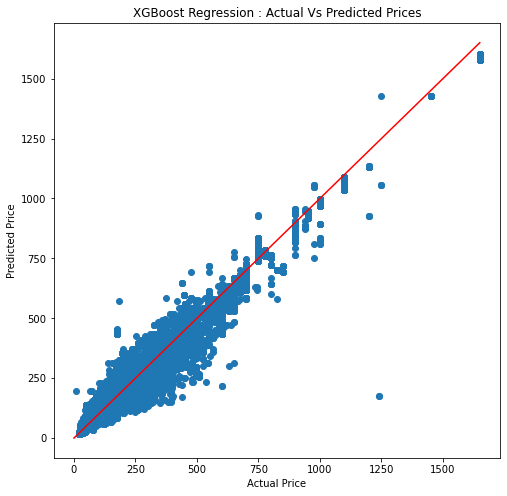

In [61]:
# 3. XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_importance = xgb.feature_importances_

#Score of xgboost model
train_score = xgb.score(X_train, y_train)
test_score = xgb.score(x_test, y_test)

#print scores of Lasso model
print('XGBoost Regression Model Score:')
print("Training_score = {:.2f}".format(train_score))
print("Testing_score = {:.2f}".format(test_score))

#validate random forest regression model
y_train_xgb_preds = xgb.predict(X_train)
y_test_xgb_preds = xgb.predict(x_test)

# printing mean_squared_error and r2_score
print('Mean Squared Error: Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, y_train_xgb_preds),
        mean_squared_error(y_test, y_test_xgb_preds)))
print('R Squared for Train: %.2f, Test: %.2f' % (
        r2_score(y_train, y_train_xgb_preds),
        r2_score(y_test, y_test_xgb_preds)))

plt.figure(figsize = (8,8))
plt.scatter(y_test,y_test_xgb_preds,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('XGBoost Regression : Actual Vs Predicted Prices');

In [62]:
# Getting the most influential features in determining the price of the property
imp_features = pd.DataFrame({
        'Features' : X_train.columns,
    'Importance_of_feature' : xgb.feature_importances_})


imp_features = imp_features.sort_values(by=['Importance_of_feature'],ascending=False).reset_index().drop(['index'],axis=1)[:15]


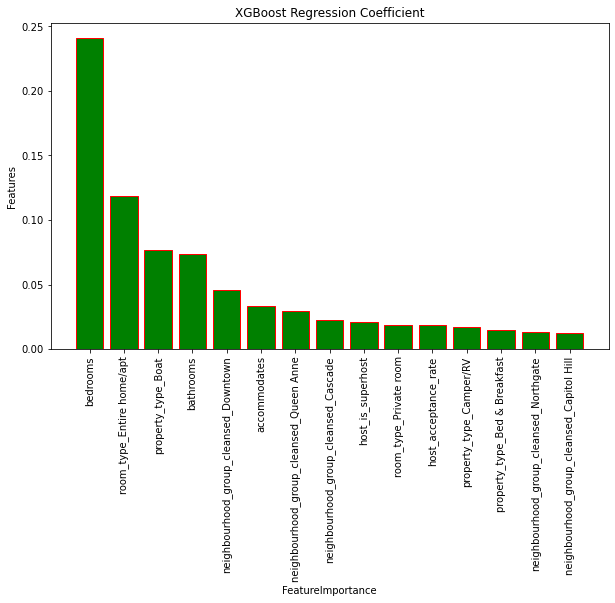

In [63]:
#Plottting in chart
f, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(imp_features['Features']))
plt.bar(y_pos,imp_features['Importance_of_feature'],color='green', edgecolor='red',align='center')
plt.xticks(y_pos, imp_features['Features'], rotation=90)
plt.title('XGBoost Regression Coefficient')
plt.ylabel('Features')
plt.xlabel('FeatureImportance')
plt.show()

From the graph above we can see that bedrooms stil affects price the most in a listing.
However, the second and third feature differs with this model.
Room_type and property_type are affecting price in second and third place respectively, leaving bathrooms in the forth place.

# 5) Evaluating all models together

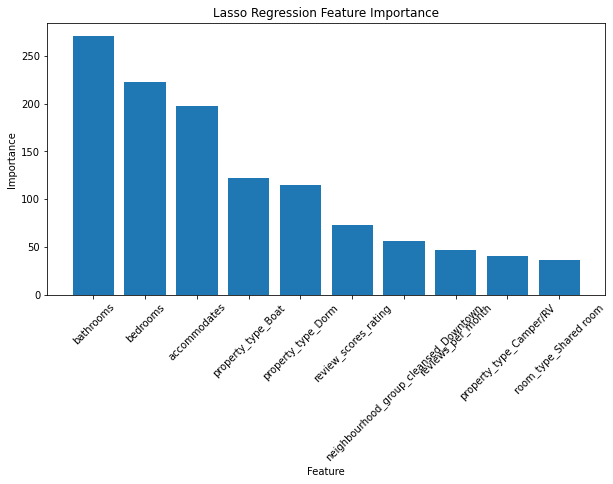

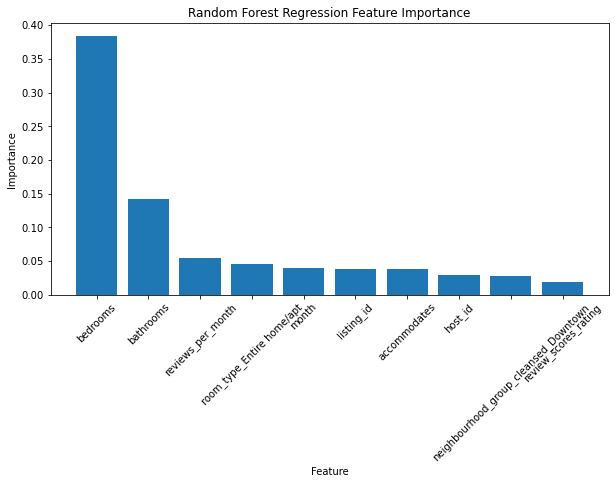

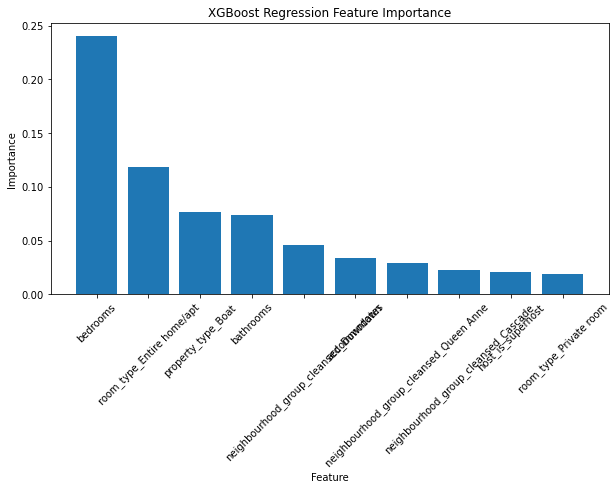

In [64]:
# Feature Importance Visualization
def plot_feature_importance(importance, model_name):
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(sorted_idx[:10])), importance[sorted_idx[:10]], align="center")
    plt.xticks(range(len(sorted_idx[:10])), X_train.columns[sorted_idx[:10]], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title(f"{model_name} Feature Importance")
    plt.show()

# Plot feature importance for each model
plot_feature_importance(lasso_importance, "Lasso Regression")
plot_feature_importance(rf_importance, "Random Forest Regression")
plot_feature_importance(xgb_importance, "XGBoost Regression")

# Conclusion

After the analysis of the datasets provided, we can answer the questions stated for this project.

1) The most popular month to rent in Seattle is December.
2) The most expensive neighborhood in Seattle for renting is Downtown.
3) The feature that affects the price most is bedrooms.

In general, the Random Forest Regression model performs better than XGBoost Regression and Lasso Regression models.
Between Random Forest and XGBoost the difference in prediction is small, but the fact that the features affects price alters, means that given a question the choice of the right model can provide different results, hence better or worst insights.